In [11]:
library(RPostgreSQL)
library(syuzhet)
library(tm)
library(RColorBrewer)
library(wordcloud)
library(twitteR)
library(topicmodels)
library(ggplot2)
library(dplyr)
library(reshape2)
library(scales)
require(parallel)
source("../aux/keys.R")

Loading required package: parallel



In [12]:
# PostgreSQL
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = db_name,
                 host = db_server, port = db_port,
                 user = db_user, password = db_password)

# Loading tweets from database

In [5]:
# tweets pt
cmd = paste("select 
    datatweet || ' ' || horatweet || ' UTC' as created, 
    text as tweet
    FROM tweet t 
    INNER JOIN amostratweet am ON am.codtweet = t.codtweet 
    WHERE am.codamostra = 222")
tweets_pt <- dbGetQuery(con, cmd)
saveRDS(tweets_pt, "data/tweets_pt.rds")

In [ ]:
# tweets users pt
cmd = paste("select 
    datatweet || ' ' || horatweet || ' UTC' as created, 
    text as tweet
    FROM tweet t 
    INNER JOIN amostratweet am ON am.codtweet = t.codtweet 
    WHERE am.codamostra = 224")
tweets_pt <- dbGetQuery(con, cmd)
saveRDS(tweets_pt, "data/tweets_users_pt.rds")

In [ ]:
# tweets bots pt
cmd = paste("select 
    datatweet || ' ' || horatweet || ' UTC' as created, 
    text as tweet
    FROM tweet t 
    INNER JOIN amostratweet am ON am.codtweet = t.codtweet 
    WHERE am.codamostra = 226")
tweets_pt <- dbGetQuery(con, cmd)
saveRDS(tweets_pt, "data/tweets_bots_pt.rds")

In [6]:
# tweets fr
cmd = paste("select 
    datatweet || ' ' || horatweet || ' UTC' as created, 
    text as tweet
    FROM tweet t 
    INNER JOIN amostratweet am ON am.codtweet = t.codtweet 
    WHERE am.codamostra = 223")
tweets_fr <- dbGetQuery(con, cmd)
saveRDS(tweets_fr, "data/tweets_fr.rds")

In [ ]:
# tweets users fr
cmd = paste("select 
    datatweet || ' ' || horatweet || ' UTC' as created, 
    text as tweet
    FROM tweet t 
    INNER JOIN amostratweet am ON am.codtweet = t.codtweet 
    WHERE am.codamostra = 225")
tweets_pt <- dbGetQuery(con, cmd)
saveRDS(tweets_pt, "data/tweets_users_fr.rds")

In [ ]:
# tweets bots pt
cmd = paste("select 
    datatweet || ' ' || horatweet || ' UTC' as created, 
    text as tweet
    FROM tweet t 
    INNER JOIN amostratweet am ON am.codtweet = t.codtweet 
    WHERE am.codamostra = 227")
tweets_pt <- dbGetQuery(con, cmd)
saveRDS(tweets_pt, "data/tweets_bots_fr.rds")

In [7]:
# portuguese tweets
tweets_pt <- readRDS("data/tweets_pt.rds")
tweets_users_pt <- readRDS("data/tweets_users_pt.rds")

# french tweets
tweets_fr <- readRDS("data/tweets_fr.rds")
tweets_users_fr <- readRDS("data/tweets_users_fr.rds")
tweets_bots_fr <- readRDS("data/tweets_bots_fr.rds")

## Sentiments

In [17]:
sentimentos <- function (tweets, lang) {
    cl <- makeCluster(detectCores() - 1)
    clusterExport(cl = cl, c("get_nrc_sentiment"))
    #bovary_sentiment_par <- get_sentiment(bovary_v, cl=cl)
    #bovary_nrc_par <- get_sentiment(bovary_v, method='nrc', cl=cl)
    sentiments <- get_nrc_sentiment(tweets , cl=cl, language=lang)
    stopCluster(cl)
    tweets <- cbind(tweets, sentiments)
    sentimentTotals <- data.frame(colSums(tweets[,c(2:9)]))
    names(sentimentTotals) <- "count"
    sentimentTotals <- cbind("sentiment" = rownames(sentimentTotals), sentimentTotals)
    rownames(sentimentTotals) <- NULL    
    print(ggplot(data = sentimentTotals, aes(x = sentiment, y = count)) +
      geom_bar(aes(fill = sentiment), stat = "identity") +
      theme(legend.position = "none") +
      xlab("Sentiment") + ylab("Total Count") + ggtitle("Total Sentiment Score for All Tweets"))
    return(sentiments)
}

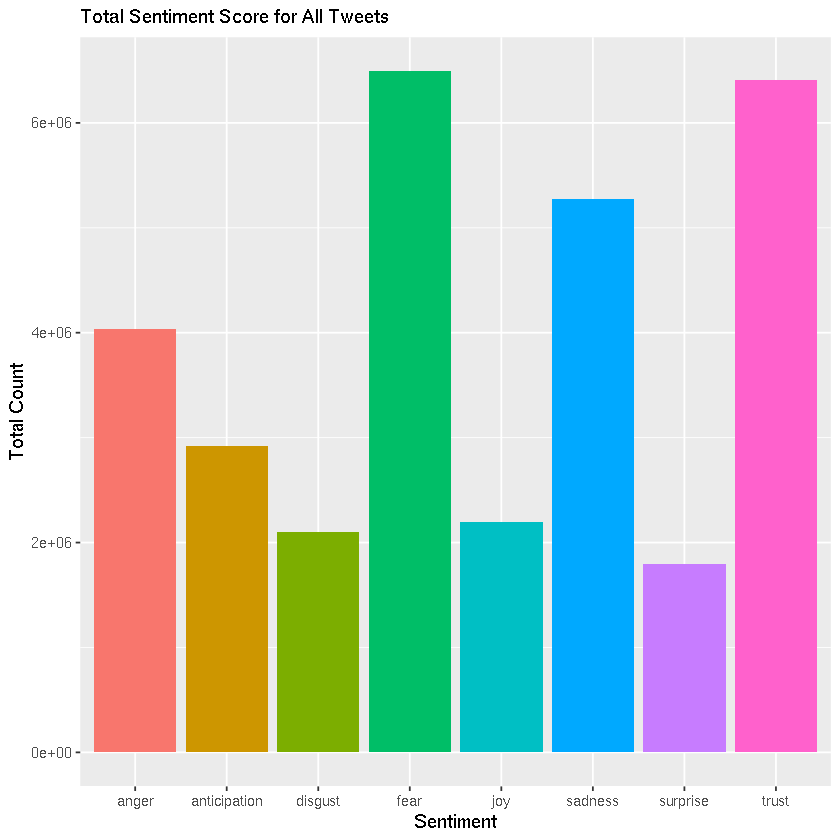

In [24]:
# tweets pt
tweets <- readRDS("data/tweets_pt.rds")
sent = sentimentos(tweets$tweet, "portuguese")
saveRDS(sent, "data/sent_pt.rds")

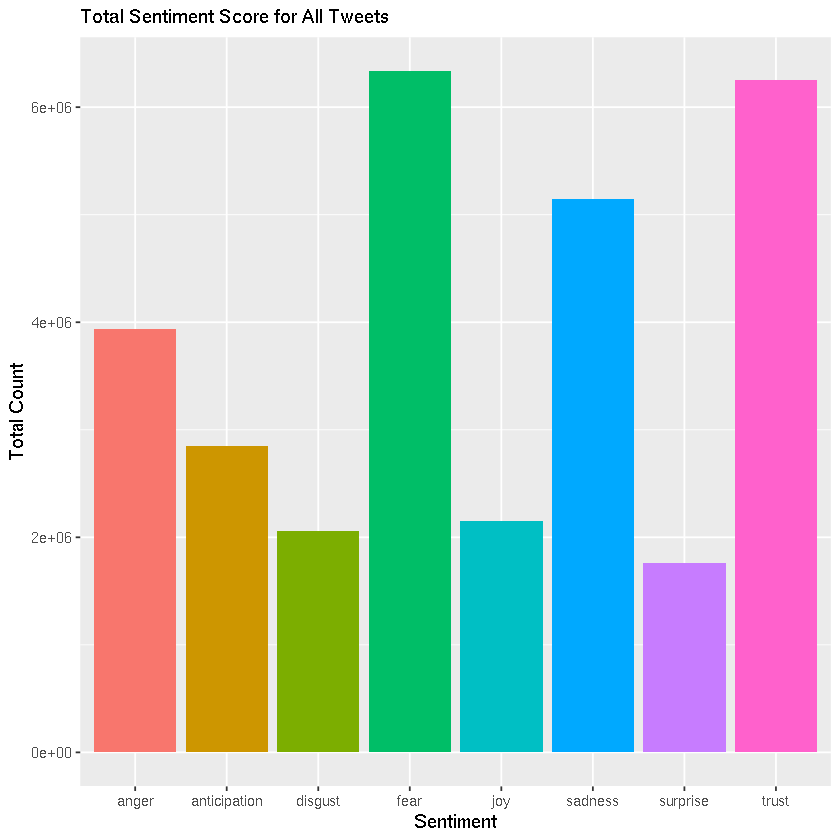

In [22]:
# tweets users pt
tweets <- readRDS("data/tweets_users_pt.rds")
sent = sentimentos(tweets$tweet, "portuguese")
saveRDS(sent, "data/sent_users_pt.rds")

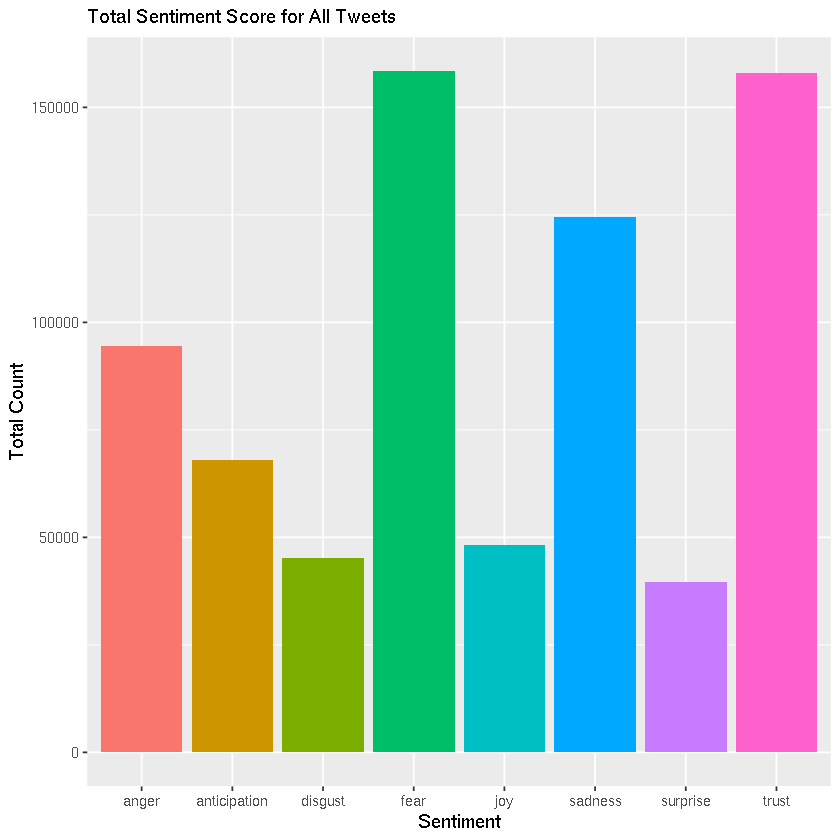

In [20]:
# tweets bots pt
tweets <- readRDS("data/tweets_bots_pt.rds")
sent = sentimentos(tweets$tweet, "portuguese")
saveRDS(sent, "data/sent_bots_pt.rds")

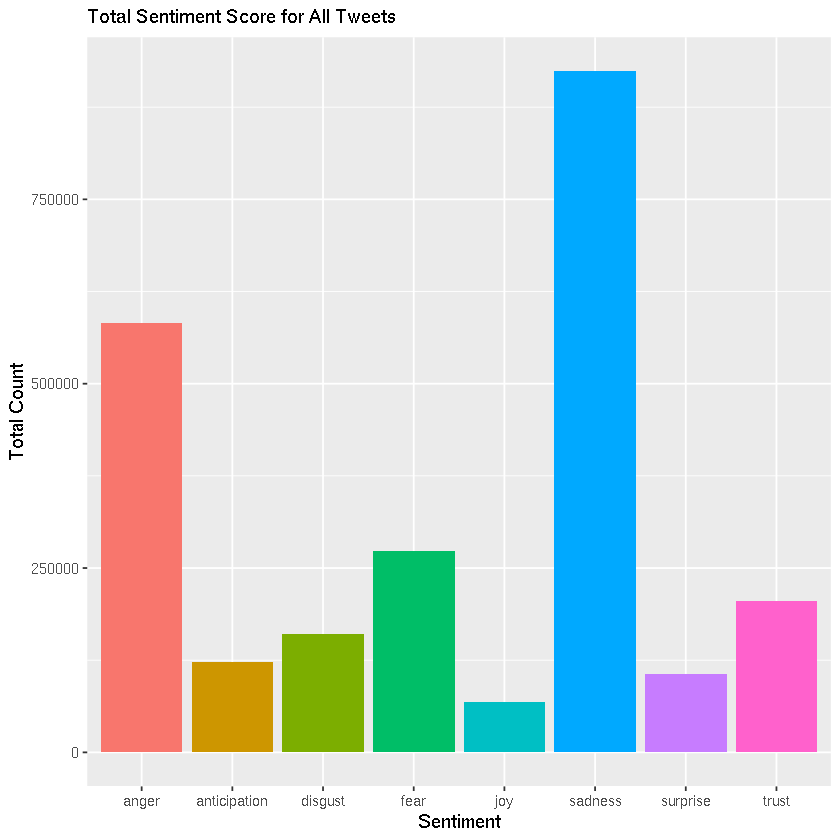

In [25]:
# tweets fr
tweets <- readRDS("data/tweets_fr.rds")
sent = sentimentos(tweets$tweet, "portuguese")
saveRDS(sent, "data/sent_fr.rds")

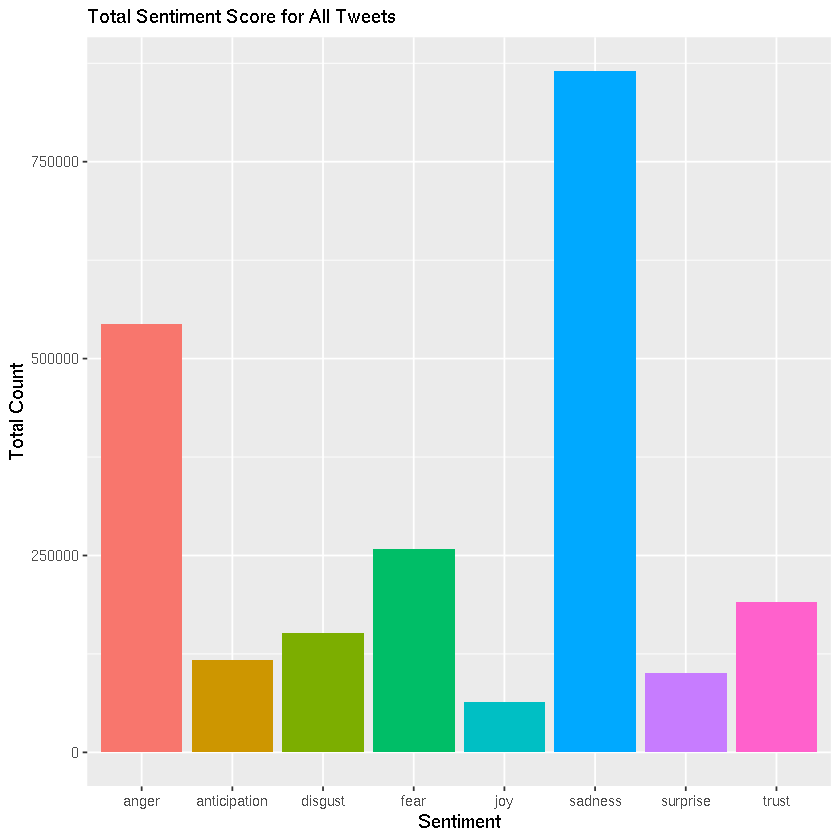

In [23]:
# tweets users fr
tweets <- readRDS("data/tweets_users_fr.rds")
sent = sentimentos(tweets$tweet, "portuguese")
saveRDS(sent, "data/sent_users_fr.rds")

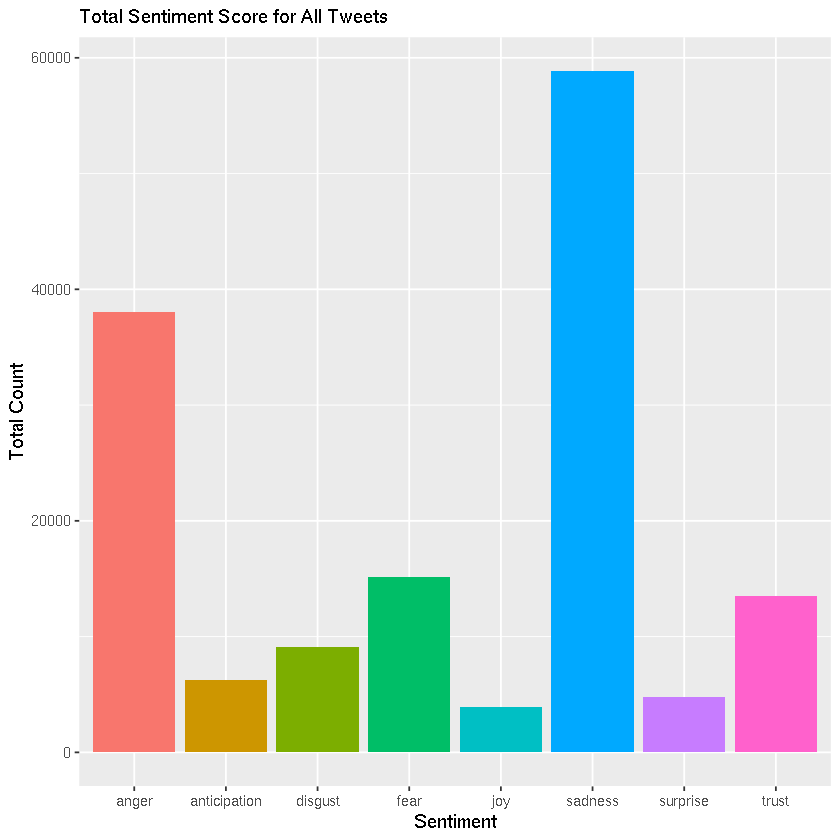

In [21]:
# tweets bots fr
tweets <- readRDS("data/tweets_bots_fr.rds")
sent = sentimentos(tweets$tweet, "portuguese")
saveRDS(sent, "data/sent_bots_fr.rds")

In [ ]:
sent_fr = sentimentos(tweets_fr$tweet, "french")

In [ ]:
sent_users_fr = sentimentos(tweets_users_fr$tweet, "french")

In [ ]:
sent_bots_fr = sentimentos(tweets_bots_fr$tweet, "french")

## Polaridade

## Termos Frequentes